In [4]:
inst = 1
field = 'SWIRE'
catcoorddir='../../doc/20170617_Stacking/maps/catcoord/TM'+str(inst)+'/'
fname=catcoorddir+'PanSTARRS/'+ field + '.txt'
df = pd.read_csv(fname)

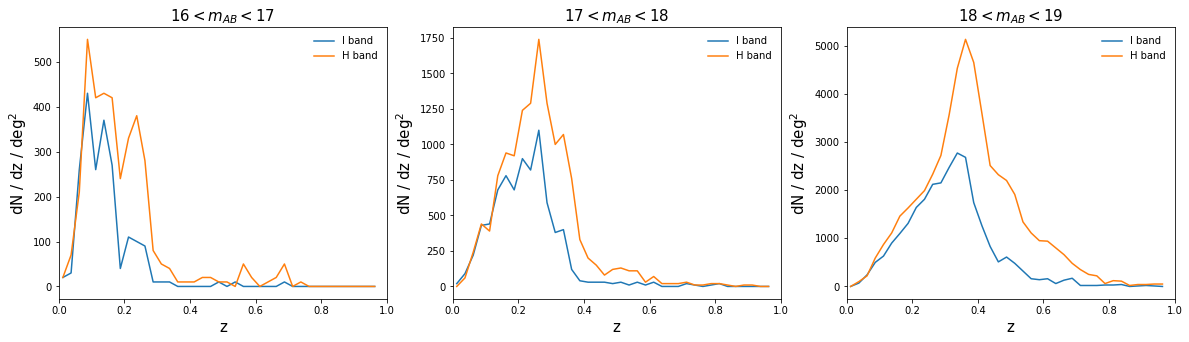

In [83]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

for i,m_min in enumerate([16,17,18]):
    m_max = m_min + 1

    dz = 0.025
    histedges_arr = np.arange(0,1,dz)
    histz_arr = (histedges_arr[1:] + histedges_arr[:-1]) / 2
    sp = np.where((df['x'] > -0.5) & (df['x'] < 1023.5) & (df['y'] > -0.5) & (df['y'] < 1023.5) \
                 & (df['I_corr'] >=m_min) & (df['I_corr'] < m_max) & (df['Photz'] >= 0))[0]
    z_arr = np.array(df['Photz'])[sp]
    ax[i].plot(histz_arr,np.histogram(z_arr, histedges_arr)[0] / dz / (4), label = 'I band')
    sp = np.where((df['x'] > -0.5) & (df['x'] < 1023.5) & (df['y'] > -0.5) & (df['y'] < 1023.5) \
                 & (df['H_corr'] >=m_min) & (df['H_corr'] < m_max) & (df['Photz'] >= 0))[0]
    z_arr = np.array(df['Photz'])[sp]
    ax[i].plot(histz_arr,np.histogram(z_arr, histedges_arr)[0] / dz / (4), label = 'H band')
    ax[i].set_xlabel('z', fontsize = 15)
    ax[i].set_ylabel('dN / dz / deg$^2$', fontsize = 15)
    ax[i].set_xlim([0,1])
    ax[i].legend(loc = 0, frameon = False)
    ax[i].set_title(r'%d$ < m_{AB} < $%d'%(m_min, m_max), fontsize = 15)
fig.savefig('SDSS_zkernel', dpi = 256, bbox_inches='tight')

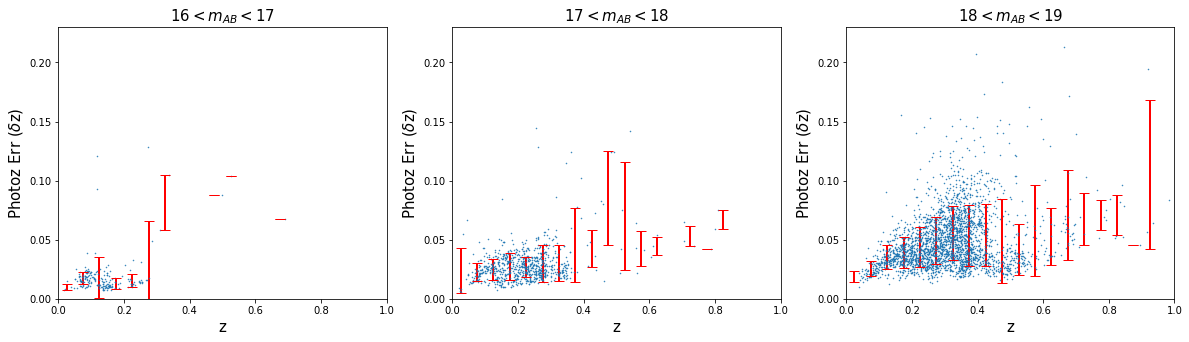

In [84]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

for i,m_min in enumerate([16,17,18]):
    m_max = m_min + 1

    sp = np.where((df['x'] > -0.5) & (df['x'] < 1023.5) & (df['y'] > -0.5) & (df['y'] < 1023.5) \
                 & (df['I_corr'] >=m_min) & (df['I_corr'] < m_max) & (df['Photz'] >= 0))[0]
    z_arr = np.array(df['Photz'])[sp]
    zErr_arr = np.array(df['PhotzErr'])[sp]

    erravg = []
    errstd = []
    dz = 0.05
    histedges_arr = np.arange(0,1,dz)
    histz_arr = (histedges_arr[1:] + histedges_arr[:-1]) / 2
    for j in range(len(histedges_arr)-1):
        zmin = histedges_arr[j]
        zmax = histedges_arr[j+1]
        spz = np.where((z_arr >= zmin) & (z_arr < zmax))[0]
        if len(spz) > 0:
            erravg.append(np.mean(zErr_arr[spz]))
            errstd.append(np.std(zErr_arr[spz]))
        else:
            erravg.append(0)
            errstd.append(0)
    erravg = np.array(erravg)
    errstd = np.array(errstd)
    ax[i].plot(z_arr, zErr_arr,'.', markersize = 1)
    spplot = np.where(np.array(erravg)!=0)[0]
    ax[i].errorbar(histz_arr[spplot], erravg[spplot], errstd[spplot], c='r', ls='None', capsize=5, lw = 2)
    ax[i].set_xlim([0,1])
    ax[i].set_ylim([0,0.23])
    ax[i].set_title(r'%d$ < m_{AB} < $%d'%(m_min, m_max), fontsize = 15)
    ax[i].set_xlabel('z', fontsize = 15)
    ax[i].set_ylabel(r'Photoz Err ($\delta$z)', fontsize = 15)
fig.savefig('SDSS_zErr', dpi = 256, bbox_inches='tight')